In [1]:
import sys
import cvxpy as cvx
import numpy as np
import matplotlib.pylab as py
from matplotlib import pyplot as plt
from scipy import linalg
from sklearn.covariance import GraphLasso as GL
%matplotlib inline

In [2]:
def GroupGraphicLasso(S, rho, groups):
    """
        S is the empirical covariance matrix.
    """
    assert S.shape[0] == S.shape[1], "Matrix must be square"
    n = S.shape[0]
    
    Phi = cvx.Variable(n, n)
    
    group_pennal=[]
    for group in groups:
        group_pennal.append(cvx.norm(Phi[group,group],"fro"))
    obj = cvx.Minimize(-(cvx.log_det(Phi) - cvx.trace(S*Phi) - rho*sum(group_pennal)))
    constraints = []

    prob = cvx.Problem(obj,constraints)
    prob.solve(solver=cvx.SCS, eps=1e-5)
    return Phi.value

In [3]:
def GroupGraphicLasso_v2(S, rho, groups):
    """
        S is the empirical covariance matrix.
    """
    assert S.shape[0] == S.shape[1], "Matrix must be square"
    n = S.shape[0]
    
    Phi = cvx.Semidef(n, n)
    
    group_pennal=[]
    for group in groups:
        group_pennal.append(cvx.norm(Phi[group,group],"fro"))
    obj = cvx.Minimize(-(cvx.log_det(Phi) - cvx.trace(S*Phi) - rho*sum(group_pennal)))
    constraints = []

    prob = cvx.Problem(obj,constraints)
    prob.solve(solver=cvx.SCS, eps=1e-5)
    return Phi.value

In [4]:
def split(x, v_list):
    """split x into a list of two numbers
        
    """
    if len(x)==3:
        return [int(x[:1]),int(x[1:])]
    if len(x)==4:
        if int(x[0:1]) in v_list and int(x[1:]) in v_list and int(x[0:2]) not in v_list and int(x[2:]) not in v_list:
            return [int(x[0:1]), int(x[1:])]
        if int(x[0:2]) in v_list and int(x[2:]) in v_list and int(x[0:1]) not in v_list and int(x[1:]) not in v_list:
            return [int(x[0:2]),int(x[2:])]
        if int(x[0:2]) in v_list and int(x[2:]) in v_list and int(x[0:1]) in v_list and int(x[1:]) in v_list:
            return [int(x[0:2]),int(x[2:])],[int(x[0:1]), int(x[1:])]
    if len(x)==5:
        return [int(x[:2]),int(x[2:])]
    if len(x)==6:
        return [int(x[:3]),int(x[3:])]

In [5]:
groupfile=r"C:\workspace\python code\Brain Network\pygspan\result50.txt"

In [96]:
graph_c=[]
subgraph=[]
v_list=[]
with open(groupfile,'r') as gf:
    for line in gf.readlines():
        line_list = line.split(' ')
        #print line_list
        if line[0] == 't':
            #print 't'
            #print "v_list:", v_list
            if len(subgraph) > 0:
                graph_c.append(subgraph)
            subgraph = []
            v_list=[]
        elif line[0] == 'e':
            #print x[3][:-1]
            subgraph.append(split(line_list[3][:-1],v_list))
        elif line[0] == 'v' :
            v_list.append(int(line_list[2][:-1]))
        else :
            continue
print graph_c

[[[58, 109]], [[34, 98]], [[34, 63]], [[34, 63], [34, 98]], [[34, 49]], [[34, 49], [34, 98]], [[34, 49], [34, 63]], [[34, 49], [34, 63], [34, 98]], [[29, 34]], [[29, 34], [34, 98]], [[29, 34], [34, 63]], [[29, 34], [34, 63], [34, 98]], [[26, 100]], [[24, 100]], [[24, 98]], [[24, 60]], [[19, 34]], [[19, 34], [34, 98]], [[19, 34], [34, 63]], [[19, 34], [34, 63], [34, 98]], [[12, 24]], [[11, 24]], [[9, 24]], [[9, 24], [24, 100]]]


In [7]:
def split(x, v_list):
    """split x into a list of two numbers
        
    """
    if len(x)==3:
        return [int(x[:1]),int(x[1:])]
    if len(x)==4:
        if int(x[0:1]) in v_list and int(x[1:]) in v_list and int(x[0:2]) not in v_list and int(x[2:]) not in v_list:
            return [int(x[0:1]), int(x[1:])]
        if int(x[0:2]) in v_list and int(x[2:]) in v_list and int(x[0:1]) not in v_list and int(x[1:]) not in v_list:
            return [int(x[0:2]),int(x[2:])]
        if int(x[0:2]) in v_list and int(x[2:]) in v_list and int(x[0:1]) in v_list and int(x[1:]) in v_list:
            return [int(x[0:2]),int(x[2:])],[int(x[0:1]), int(x[1:])]
    if len(x)==5:
        return [int(x[:2]),int(x[2:])]
    if len(x)==6:
        return [int(x[:3]),int(x[3:])]
def transforGroupInfo(groupfile):
    graph_c=[]
    subgraph=[]
    v_list=[]
    with open(groupfile,'r') as gf:
        for line in gf.readlines():
            line_list = line.split(' ')
            #print line_list
            if line[0] == 't':
                #print 't'
                if len(subgraph) > 0:
                    graph_c.append(subgraph)
                v_list=[]
                subgraph = []
            elif line[0]== 'e':
                #print x[3][:-1]
                subgraph.append(split(line_list[3][:-1],v_list))
            elif line[0] == 'v' :
                v_list.append(int(line_list[2][:-1]))
            else :
                continue
    return graph_c
graph_c = transforGroupInfo(groupfile)
print graph_c

[[[58, 109]], [[34, 98]], [[34, 63]], [[34, 63], [34, 98]], [[34, 49]], [[34, 49], [34, 98]], [[34, 49], [34, 63]], [[34, 49], [34, 63], [34, 98]], [[29, 34]], [[29, 34], [34, 98]], [[29, 34], [34, 63]], [[29, 34], [34, 63], [34, 98]], [[26, 100]], [[24, 100]], [[24, 98]], [[24, 60]], [[19, 34]], [[19, 34], [34, 98]], [[19, 34], [34, 63]], [[19, 34], [34, 63], [34, 98]], [[12, 24]], [[11, 24]], [[9, 24]], [[9, 24], [24, 100]]]


In [9]:
def transformat(graph_c):
    groups=[]
    for g in graph_c:
        subg=set()
        for conpon in g:
            for v in conpon:
                subg.add(v)
        groups.append(list(subg))
    #print groups
    groups = [np.array(g) for g in groups]
    return groups
groups = transformat(graph_c)
print groups

[array([ 58, 109]), array([34, 98]), array([34, 63]), array([34, 98, 63]), array([49, 34]), array([49, 34, 98]), array([49, 34, 63]), array([49, 34, 98, 63]), array([34, 29]), array([34, 98, 29]), array([34, 29, 63]), array([34, 98, 29, 63]), array([ 26, 100]), array([ 24, 100]), array([24, 98]), array([24, 60]), array([34, 19]), array([34, 19, 98]), array([34, 19, 63]), array([34, 19, 98, 63]), array([24, 12]), array([24, 11]), array([24,  9]), array([ 24,   9, 100])]


In [10]:
#import GroupedGraphicLasso as gg

In [11]:
import pandas as pd
raw=pd.read_csv(r'C:\Users\zc\Documents\NeuralNetwork\cleaned\0015002\sfnwmrda0015002_session_1_rest_1_aal_TCs.csv')
print raw.shape
raw1=pd.read_csv(r'C:\Users\zc\Documents\NeuralNetwork\cleaned\0015002\sfnwmrda0015002_session_1_rest_2_aal_TCs.csv')
print raw1.shape
raw2=pd.read_csv(r'C:\Users\zc\Documents\NeuralNetwork\cleaned\0015002\sfnwmrda0015002_session_1_rest_3_aal_TCs.csv')
print raw2.shape
raw3=pd.read_csv(r'C:\Users\zc\Documents\NeuralNetwork\cleaned\0015002\sfnwmrda0015002_session_1_rest_4_aal_TCs.csv')
print raw3.shape
raw4=pd.read_csv(r'C:\Users\zc\Documents\NeuralNetwork\cleaned\0015002\sfnwmrda0015002_session_1_rest_5_aal_TCs.csv')
print raw4.shape
raw5=pd.read_csv(r'C:\Users\zc\Documents\NeuralNetwork\cleaned\0015002\sfnwmrda0015002_session_1_rest_6_aal_TCs.csv')
print raw5.shape
raw_t=pd.concat([raw,raw1,raw2,raw3,raw4,raw5],axis=0)
print raw_t.shape
X=np.array(raw_t)
print X.shape

(72, 116)
(72, 116)
(72, 116)
(72, 116)
(72, 116)
(72, 116)
(432, 116)
(432L, 116L)


In [12]:
pennal_list1=np.arange(0.1,0.5,0.075)
print len(pennal_list1)
print pennal_list1
pennal_list2=pennal_list1*2
print pennal_list2

6
[ 0.1    0.175  0.25   0.325  0.4    0.475]
[ 0.2   0.35  0.5   0.65  0.8   0.95]


In [13]:
ggl_list=[]
for pennal in pennal_list2:
    ###grouped graphic lasso
    S=np.cov(X.T)
    print S.shape
    test=GroupGraphicLasso_v2(S,pennal,groups)
    ggl_list.append(test)

(116L, 116L)
(116L, 116L)
(116L, 116L)
(116L, 116L)
(116L, 116L)
(116L, 116L)


In [14]:
gl_list=[]
for pennal in pennal_list2:
    ###graphic lasso
    model = GL(alpha=pennal)
    model.fit(X)
    #cov_ = model.covariance_
    prec_ = model.precision_
    gl_list.append(prec_)

C:\Anaconda2\lib\site-packages\sklearn\covariance\graph_lasso_.py:252: ConvergenceWarning: graph_lasso: did not converge after 100 iteration: dual gap: 4.424e-02
  ConvergenceWarning)


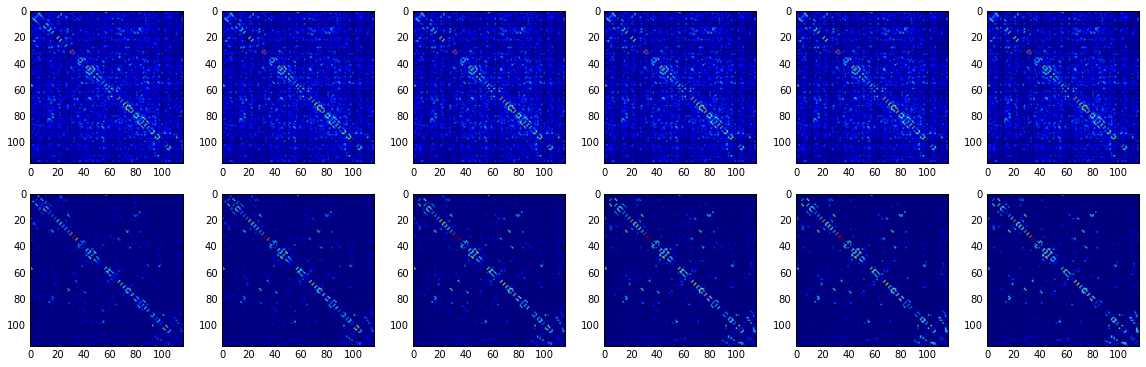

In [15]:
def set_zero(data):
    '''to visualize clearly, we set all diagonal element to 0'''
    z=np.zeros(data.shape)
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if i!=j:
                z[i,j]=data[i,j]
    return z
pennelty_number=len(ggl_list)
fig,ax = plt.subplots(ncols=pennelty_number,nrows=2)
for i in range(2):
    for j in range(pennelty_number):
            if i<1:
                value=set_zero(abs(ggl_list[j]))
                ax[i][j].imshow(value)
            else:
                value=set_zero(abs(gl_list[j]))
                ax[i][j].imshow(value)
fig.set_size_inches(20,6)
plt.show()